In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikeras

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, matthews_corrcoef

from tensorflow.keras.layers import Input, LayerNormalization, MultiHeadAttention, Add, Flatten






In [ ]:
df = pd.read_csv('/content/drive/My Drive/TMU MSC/MRP/final.csv') # reading the dataset created from the extracted features of both classes
df.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,spectral_contrast,label
0,0.499429,0.045906,1477.871452,1650.648672,2756.250000,0.060203,-347.903839,129.911545,-12.688540,35.006527,...,4.356218,8.751603,4.949977,0.441512,1.470134,3.997265,-0.351662,3.268352,21.671775,0
1,0.486760,0.053563,1589.997260,1340.286377,2237.250866,0.102151,-205.790100,129.722672,-100.581757,-53.443851,...,-8.526023,-2.834571,-16.885719,1.259422,-3.710742,-3.283498,1.299076,3.501615,20.861829,1
2,0.283023,0.019542,1245.617540,1607.189807,2153.565008,0.039284,-372.478149,145.942841,-22.395941,6.288597,...,-9.829761,-7.139560,-7.890902,1.485827,-11.636086,-7.770608,-6.128963,-5.891862,24.880914,1
3,0.704936,0.012575,3658.994010,2561.641643,6670.466561,0.261214,-237.726913,18.325443,-59.224773,-15.345366,...,-13.352977,-8.223192,-9.669504,-2.235290,-8.099798,-1.844251,-6.385151,-3.172643,18.112736,0
4,0.388010,0.015539,3194.280182,2405.771778,5576.365523,0.180220,-331.307159,55.652039,8.687071,1.657524,...,-9.651941,-7.914859,-13.250055,-8.507153,-13.488628,-5.689762,-8.554969,-10.048347,21.739148,0


In [ ]:
X= df.drop(['label'], axis=1) # creating dependent and independent variables
y = df['label']

In [ ]:
scaler = MinMaxScaler()
data = scaler.fit_transform(X)

# Reshape data to 3D [samples, timesteps, features]
data = data.reshape((data.shape[0], 1, data.shape[1]))

# Split the data
X_train, X_val, y_train, y_val = train_test_split(data, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

Model 1 with Dropouts

In [ ]:
model_1 = Sequential()
model_1.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_1.add(Dropout(0.2))
model_1.add(LSTM(units=50, return_sequences=False))
model_1.add(Dropout(0.2))
model_1.add(Dense(units=1, activation='sigmoid'))

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_1.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

loss, accuracy = model_1.evaluate(X_val, y_val)
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/100
688/688 [==============================] - 9s 8ms/step - loss: 0.5839 - accuracy: 0.6836 - val_loss: 0.4801 - val_accuracy: 0.7984
Epoch 2/100
688/688 [==============================] - 8s 12ms/step - loss: 0.4549 - accuracy: 0.8033 - val_loss: 0.4011 - val_accuracy: 0.8277
Epoch 3/100
688/688 [==============================] - 4s 6ms/step - loss: 0.3835 - accuracy: 0.8260 - val_loss: 0.3555 - val_accuracy: 0.8372
Epoch 4/100
688/688 [==============================] - 6s 8ms/step - loss: 0.3503 - accuracy: 0.8358 - val_loss: 0.3299 - val_accuracy: 0.8421
Epoch 5/100
688/688 [==============================] - 4s 6ms/step - loss: 0.3319 - accuracy: 0.8376 - val_loss: 0.3185 - val_accuracy: 0.8448
Epoch 6/100
688/688 [==============================] - 4s 6ms/step - loss: 0.3173 - accuracy: 0.8443 - val_loss: 0.3271 - val_accuracy: 0.8374
Epoch 7/100
688/688 [==============================] - 5s 8ms/step - loss: 0.3063 - accuracy: 0.8527 - val_loss: 0.2917 - val_accuracy: 0.861

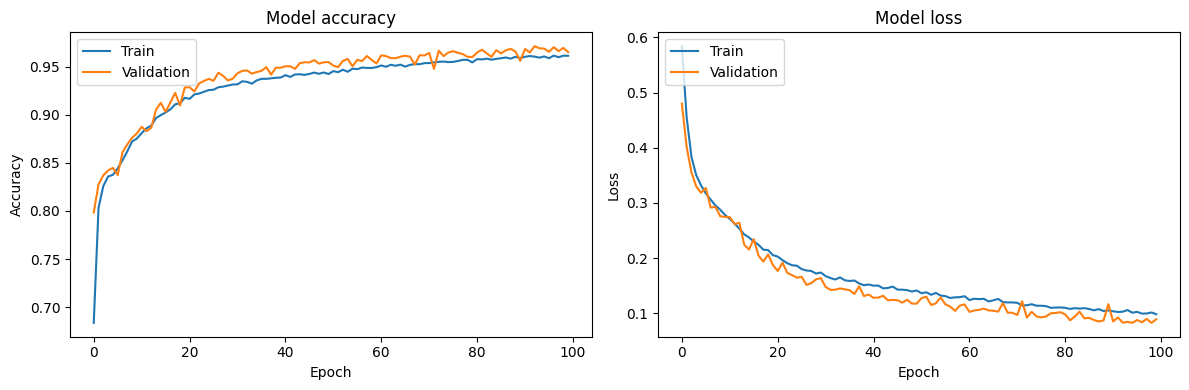

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Model 2 Without Dropouts

In [ ]:
model_2 = Sequential()
model_2.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_2.add(Dropout(0.0))
model_2.add(LSTM(units=50, return_sequences=False))
model_2.add(Dropout(0.0))
model_2.add(Dense(units=1, activation='sigmoid'))

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

loss, accuracy = model_2.evaluate(X_val, y_val)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/100
688/688 [==============================] - 9s 9ms/step - loss: 0.5638 - accuracy: 0.7085 - val_loss: 0.4786 - val_accuracy: 0.8048
Epoch 2/100
688/688 [==============================] - 4s 6ms/step - loss: 0.4584 - accuracy: 0.8080 - val_loss: 0.4315 - val_accuracy: 0.8212
Epoch 3/100
688/688 [==============================] - 4s 6ms/step - loss: 0.4209 - accuracy: 0.8209 - val_loss: 0.4404 - val_accuracy: 0.7888
Epoch 4/100
688/688 [==============================] - 5s 7ms/step - loss: 0.3913 - accuracy: 0.8305 - val_loss: 0.3855 - val_accuracy: 0.8430
Epoch 5/100
688/688 [==============================] - 4s 6ms/step - loss: 0.3573 - accuracy: 0.8385 - val_loss: 0.3690 - val_accuracy: 0.8263
Epoch 6/100
688/688 [==============================] - 4s 6ms/step - loss: 0.3236 - accuracy: 0.8505 - val_loss: 0.3160 - val_accuracy: 0.8623
Epoch 7/100
688/688 [==============================] - 5s 7ms/step - loss: 0.3007 - accuracy: 0.8659 - val_loss: 0.2900 - val_accuracy: 0.8725

In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 50)             15600     
                                                                 
 dropout_4 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 35851 (140.04 KB)
Trainable params: 35851 (140.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Prediction on Test Set**

108/108 [==============================] - 1s 3ms/step
Accuracy: 0.9738
Precision: 0.9882
Recall: 0.9643
AUC-ROC: 0.9955
MCC: 0.9475


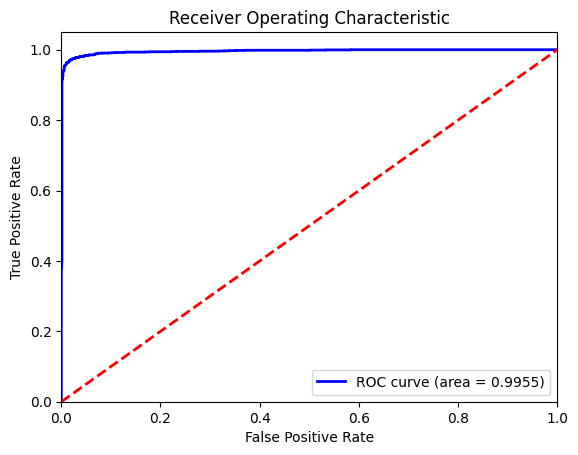

In [ ]:
y_pred_prob = model_2.predict(X_test)  # Get the probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to class labels

#  Calculate accuracy, precision, recall, and MCC
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

#  Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# S Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'AUC-ROC: {roc_auc:.4f}')
print(f'MCC: {mcc:.4f}')

# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()